In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import qgrid
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

#import pzfxlib as pz
#from openpyxl import Workbook
#from openpyxl.utils import get_column_letter
%matplotlib notebook
%config IPCompleter.greedy=True


In [2]:
#paste Mouse Grouping as you defines structure in Prism
#group_columns = ['Group','id']
B75_group_tbl = pd.read_csv("B75-group.csv", 
                        sep=',',
                       dtype={"group":str, "id":str})

B73_group_tbl = pd.read_csv("B73-group.csv", 
                        sep=',',
                       dtype={"group":str, "id":str})


In [3]:
#load bleed timepoints RNA Ct value from excel
B73_excel = pd.ExcelFile('B73 RNA MX1 HPRT1 Ct.xlsx')
B73_sheets = B73_excel.sheet_names
B73_timepoints = B73_sheets

B75_excel = pd.ExcelFile('B75 RNA MX1 HPRT1 Ct.xlsx')
B75_sheets = B75_excel.sheet_names
B75_timepoints = B75_sheets


In [19]:

def graphByLogCt (cohort_excel_file, cohort_group_tbl):
    cohort_excel = pd.ExcelFile(cohort_excel_file)
    cohort_sheets = cohort_excel.sheet_names
    df_timepoints = pd.DataFrame()
    for i in cohort_sheets:
        df = pd.read_excel(cohort_excel,i)
        df['id'] = df['id'].astype(str)
        df = cohort_group_tbl.merge(df, on='id',how='left')

        df['time-point'] = i
        df['Ct ratio'] = df['MX1'].div(df['HPRT1'], axis ="index") # normalize by HPRT1
        df['Log10 Ct'] = -np.log(df['Ct ratio'])  # negative log transformation scale
        
        df_control = df.loc[df['Group'] == 'Uninfected Control']
        controlAvgRef_Mean = df_control['HPRT1'].mean
        controlAvgTarget_Mean = df_control['MX1'].mean
        
        df['delta MX1'] = df['delta MX1'].astype(float)
        df['delta MX1'] = df['MX1'].sub(controlAvgTarget_Mean, axis ="index")
        
        df_timepoints = df_timepoints.append(df)
        
    df_timepoints = df_timepoints.dropna(subset=['Log10 Ct'])
    df_timepoints.reset_index()
        
    plt.figure(figsize = (12, 12), dpi= 100)
    ax = sns.boxplot(x = "time-point", y = "Log10 Ct", data = df_timepoints, hue ='Group',
                     hue_order = ['Uninfected Control', 'Tumor only', 'HIV', 'HIV + Tumor', 'HIV + Tumor + ART'], showfliers=True, linewidth=1)
    
    # ----------------------------------------------------------------------------------------------------
    # prettify the plot

    # get the current figure
    ax = plt.gca()
    #ax.set_yscale("log")
    #sns.set_style("whitegrid")
    #ax.grid(color='#cccccc')
    # get the xticks to iterate over
    xticks = ax.get_xticks()

    # iterate over every xtick and add a vertical line
    # to separate different classes
    #pos = range(len(nobs))

    for tick in xticks:
        ax.vlines(tick + 0.5, 0, np.max(df_timepoints["Log10 Ct"]), color = "grey", alpha = .1)
        #ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
                #horizontalalignment='center', size='small', color='black', weight='semibold')


    # rotate the x and y ticks
    ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
    ax.tick_params(axis = 'y', labelsize = 12)

    # add x and y label
    ax.set_xlabel("Post infection Time points", fontsize = 14)
    ax.set_ylabel("Relative MX1/HPRT1 expression", fontsize = 14)

    # add a title and put the legend on a specific location
    ax.set_title("MX1 expression using Ct value", fontsize = 14)
    ax.legend(loc = "lower left", fontsize = 10);
    plt.show()
    return df_timepoints



In [20]:
df_B75 = graphByLogCt(cohort_excel_file = 'B75 RNA MX1 HPRT1 Ct.xlsx', cohort_group_tbl = B75_group_tbl )


KeyError: 'delta MX1'

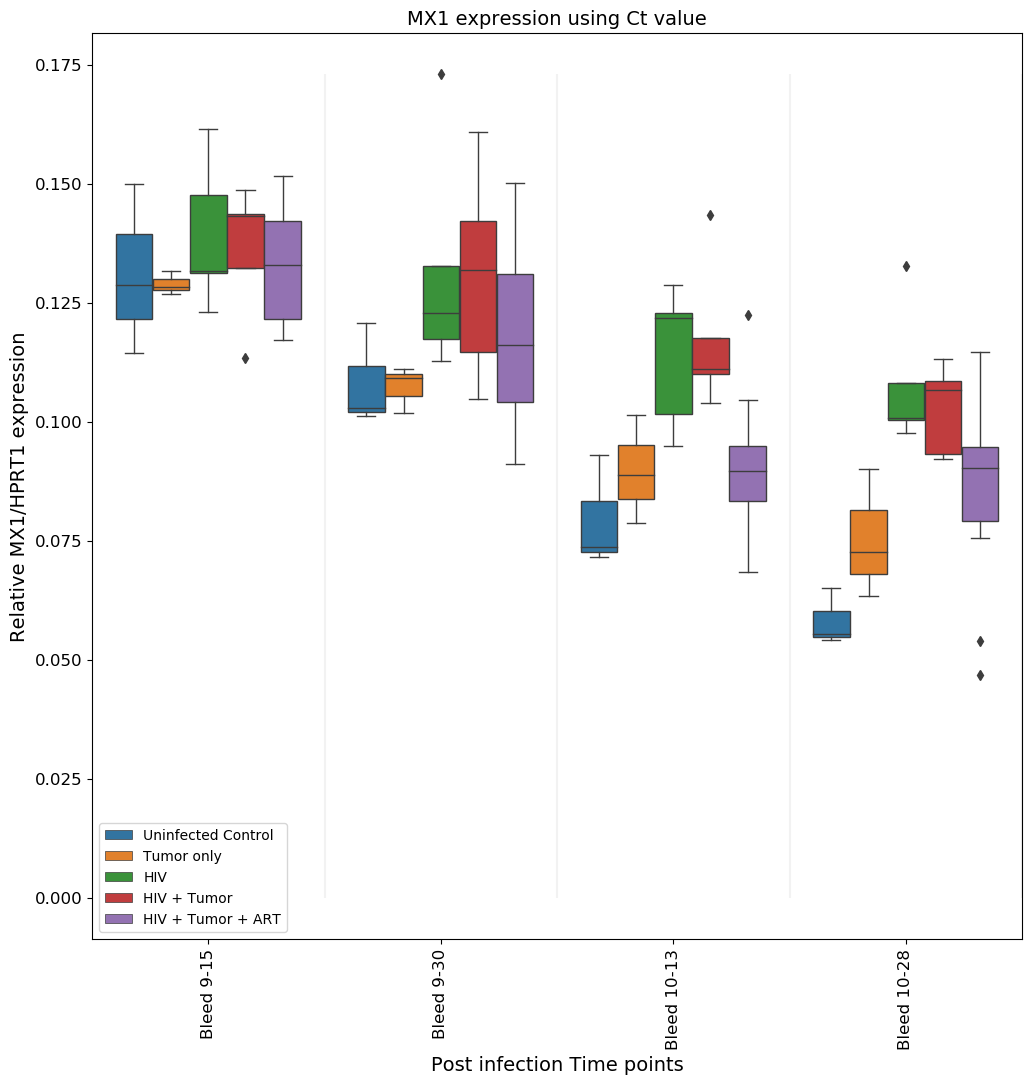

In [6]:
df_B73 = graphByLogCt(cohort_excel_file = 'B73 RNA MX1 HPRT1 Ct.xlsx', cohort_group_tbl = B73_group_tbl )

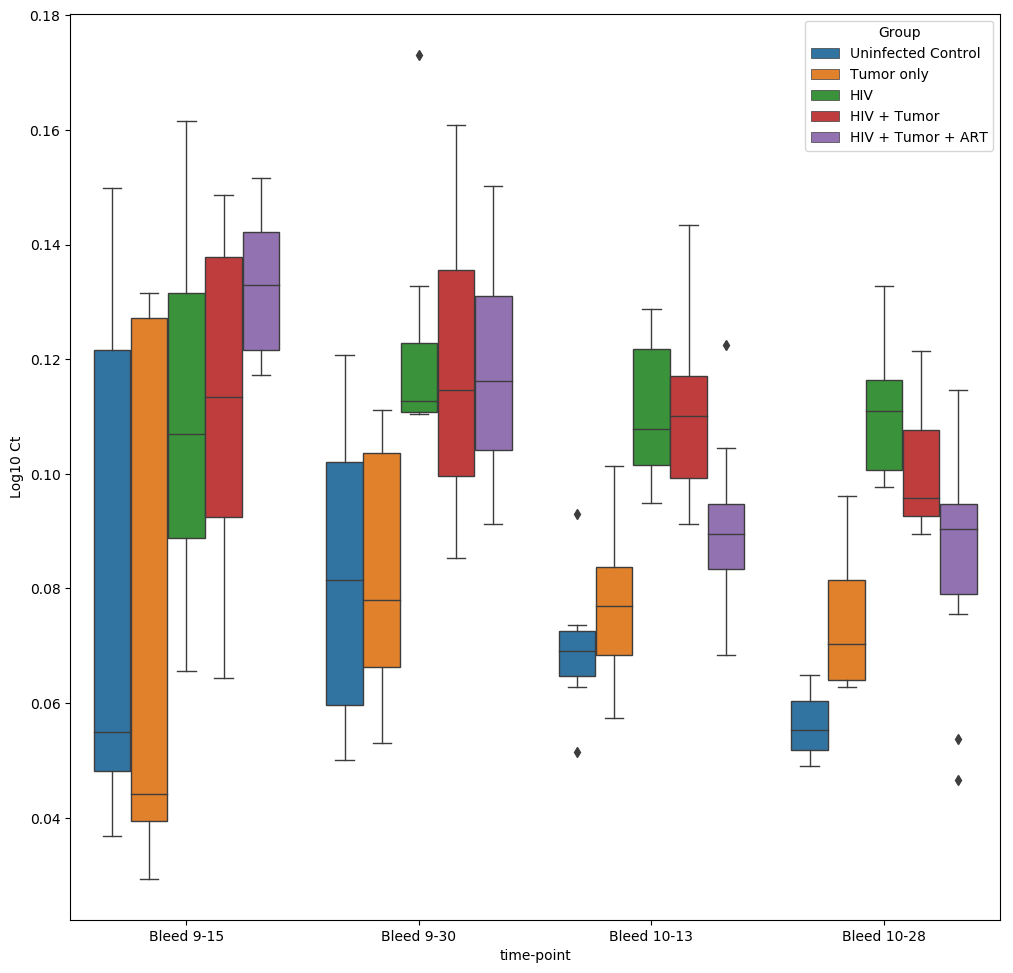

In [7]:
df_B73B75 = df_B73.append(df_B75)
plt.figure(figsize = (12, 12), dpi= 100)
ax = sns.boxplot(x = "time-point", y = "Log10 Ct", data = df_B73B75, hue ='Group',
                     hue_order = ['Uninfected Control', 'Tumor only', 'HIV', 'HIV + Tumor', 'HIV + Tumor + ART'], showfliers=True, linewidth=1)
#sns.stripplot(x = 'time-point', y = 'Log10 Ct', data = df_B73B75, hue ='Group', color = 'black', size = 3, jitter = 1,dodge=True)

In [ ]:
df_B75.shape

In [9]:
df_control = df_B75.loc[df_B75['Group'] == 'Uninfected Control']
df_control

,Group,id,HPRT1,MX1,time-point,Ct ratio,Log10 Ct
0,Uninfected Control,1,32.098600,30.654411,Bleed 9-15,0.955008,0.046036
4,Uninfected Control,5,32.441215,31.269554,Bleed 9-15,0.963884,0.036785
8,Uninfected Control,9,31.716814,30.165879,Bleed 9-15,0.951101,0.050136
18,Uninfected Control,19,31.912703,30.205807,Bleed 9-15,0.946514,0.054970
0,Uninfected Control,1,30.995718,29.250633,Bleed 9-30,0.943699,0.057948
4,Uninfected Control,5,31.008034,29.495328,Bleed 9-30,0.951216,0.050014
8,Uninfected Control,9,31.575118,29.105536,Bleed 9-30,0.921787,0.081441
18,Uninfected Control,19,30.844683,29.011738,Bleed 9-30,0.940575,0.061264
0,Uninfected Control,1,30.361232,28.837453,Bleed 10-13,0.949812,0.051492
4,Uninfected Control,5,31.139602,29.241891,Bleed 10-13,0.939058,0.062878


In [11]:
controlAvgRef_Mean = df_control['HPRT1'].mean
controlAvgRef_Mean

<bound method Series.mean of 0     32.098600
4     32.441215
8     31.716814
18    31.912703
0     30.995718
4     31.008034
8     31.575118
18    30.844683
0     30.361232
4     31.139602
8     31.216749
18    30.144158
0     29.523868
4     28.821823
8     29.703591
18    29.693212
Name: HPRT1, dtype: float64>